# Regression

To understand how the number of samples can affect differents kinds of regression models, two models was created one containing all samples and the other just half of it.



# Regression Steps 


*   Data load.
*   Analyse the correlations between the features to choose two of then.
*   Applying the linear regression method in a linear model
*   Applying the linear regression method in a polynomial model of degree 3
*   Applying the linear regression method in a polynomial model of degree 5



# Resultados 

In [0]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):


    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):


    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

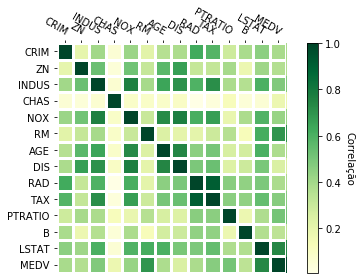

In [0]:
from sklearn import linear_model
from sklearn import datasets 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

data = datasets.load_boston() 
a = data.feature_names
a = np.append(a,'MEDV')

print(data.DESCR)
dfT = pd.DataFrame(np.column_stack((data.data, data.target)), columns = a)

df = pd.DataFrame(data.data, columns=data.feature_names)
corrmatrix = abs(np.array(dfT.corr()))

fig, ax = plt.subplots()
im, cbar = heatmap(corrmatrix, a, a, ax=ax, cmap="YlGn", cbarlabel="Correlação")


fig.tight_layout()
plt.tight_layout()
plt.show()



**Applying the linear regression method in a linear model**

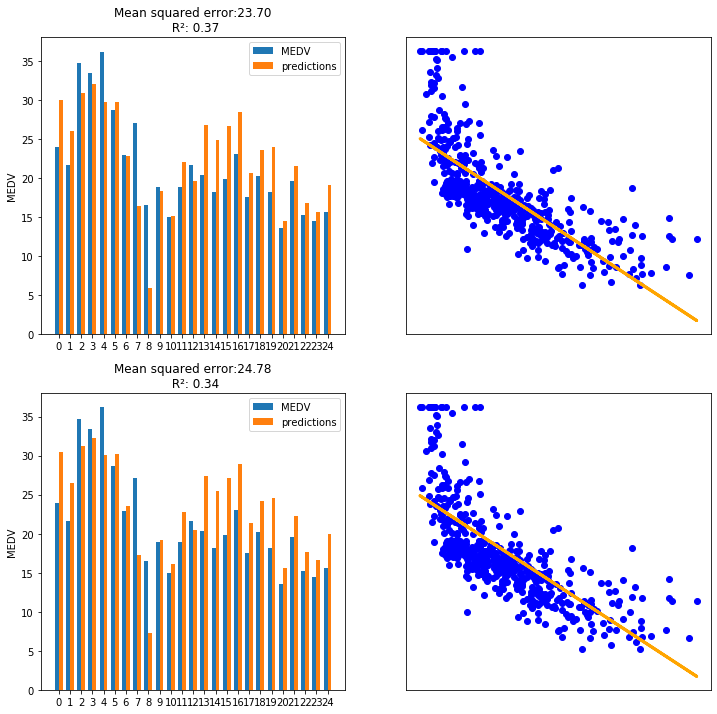

In [0]:
x = pd.DataFrame(data.data[:, 12], columns=['LSTAT'])
target = pd.DataFrame(data.target, columns=['MEDV'])

nTest = 25
X1 = x[nTest:-280]
y1 = target['MEDV'][nTest:-280]
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(X1,y1)
Xtest1 = x[0:nTest]
ytest1 = target['MEDV'][0:nTest]

predictions1 = lm1.predict(x)
lm1.score(Xtest1,ytest1)
predictionsTest1 = predictions1[0:nTest]

X2 = x[nTest:-1]
y2 = target['MEDV'][nTest:-1]
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X2,y2)
Xtest2 = x[0:nTest]
ytest2 = target['MEDV'][0:nTest]

predictions2 = lm2.predict(x)
lm2.score(Xtest2,ytest2)
predictionsTest2 = predictions2[0:nTest]



lb = np.arange(len(Xtest2))  # the label locations
width = 0.35  # the width of the bars

figure = plt.figure(figsize=(12, 12))

ax = plt.subplot(2, 2, 1)
rects1 = ax.bar(lb - width/2, ytest2, width, label='MEDV')
rects2 = ax.bar(lb + width/2, predictionsTest2, width, label='predictions')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MEDV')
title = "Mean squared error:%.2f"% mean_squared_error(ytest2, predictionsTest2)+"\n R²: %.2f" % r2_score(ytest2, predictionsTest2)
ax.set_title(title)
ax.set_xticks(lb)
ax.legend()

ax = plt.subplot(2, 2, 2)
plt.scatter(x, target['MEDV'],  color='blue')
plt.plot(x, predictions2, color='orange', linewidth=3)

plt.xticks(())
plt.yticks(())

ax = plt.subplot(2, 2, 3)
rects1 = ax.bar(lb - width/2, ytest1, width, label='MEDV')
rects2 = ax.bar(lb + width/2, predictionsTest1, width, label='predictions')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MEDV')
title = "Mean squared error:%.2f"% mean_squared_error(ytest1, predictionsTest1)+"\n R²: %.2f" % r2_score(ytest1, predictionsTest1)
ax.set_title(title)
ax.set_xticks(lb)
ax.legend()

ax = plt.subplot(2, 2, 4)
plt.scatter(x, target['MEDV'],  color='blue')
plt.plot(x, predictions1, color='orange', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**Applying the linear regression method in a polynomial model of degree 3**

(506,)
Mean squared error: 19.55487074991815
R²: 0.48


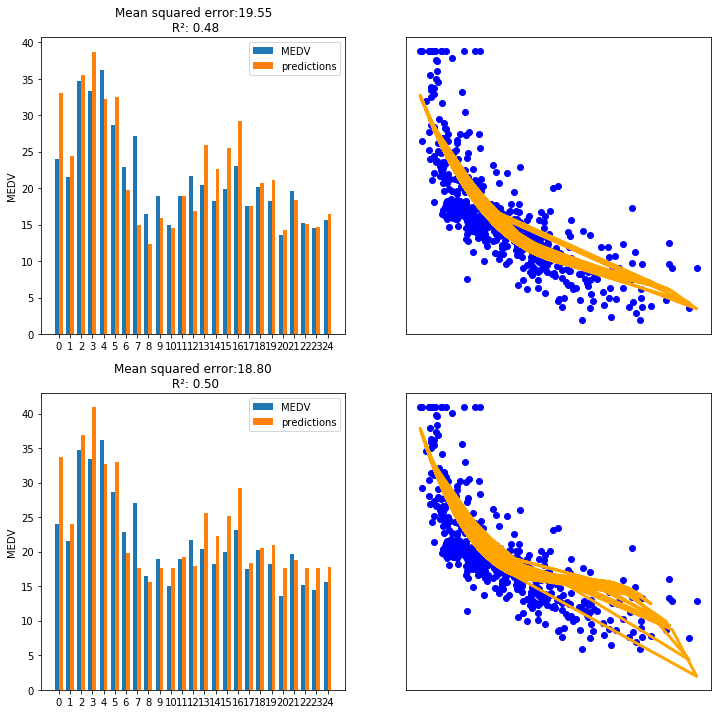

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

x = pd.DataFrame(data.data[:, 12], columns=['LSTAT'])
target = pd.DataFrame(data.target, columns=['MEDV'])

nTest = 25
X1 = x[nTest:-280]
y1 = target['MEDV'][nTest:-280]
lm1 = make_pipeline(PolynomialFeatures(3), Ridge())
model1 = lm1.fit(X1,y1)
Xtest1 = x[0:nTest]
ytest1 = target['MEDV'][0:nTest]

predictions1 = lm1.predict(x)
lm1.score(Xtest1,ytest1)
predictionsTest1 = predictions1[0:nTest]
print(predictions1.shape)
X2 = x[nTest:-1]
y2 = target['MEDV'][nTest:-1]
lm2 = make_pipeline(PolynomialFeatures(3), Ridge())
model2 = lm2.fit(X2,y2)
Xtest2 = x[0:nTest]
ytest2 = target['MEDV'][0:nTest]

predictions2 = lm2.predict(x)
lm2.score(Xtest2,ytest2)
predictionsTest2 = predictions2[0:nTest]
print("Mean squared error:", mean_squared_error(ytest2, predictionsTest2))

print('R²: %.2f' % r2_score(ytest2, predictionsTest2))

lb = np.arange(len(Xtest2))  
width = 0.35  

figure = plt.figure(figsize=(12, 12))

ax = plt.subplot(2, 2, 1)
rects1 = ax.bar(lb - width/2, ytest2, width, label='MEDV')
rects2 = ax.bar(lb + width/2, predictionsTest2, width, label='predictions')


ax.set_ylabel('MEDV')
title = "Mean squared error:%.2f"% mean_squared_error(ytest2, predictionsTest2)+"\n R²: %.2f" % r2_score(ytest2, predictionsTest2)
ax.set_title(title)
ax.set_xticks(lb)
ax.legend()

ax = plt.subplot(2, 2, 2)
plt.scatter(x, target['MEDV'],  color='blue')
plt.plot(x, predictions2, color='orange', linewidth=3)

plt.xticks(())
plt.yticks(())

ax = plt.subplot(2, 2, 3)
rects1 = ax.bar(lb - width/2, ytest1, width, label='MEDV')
rects2 = ax.bar(lb + width/2, predictionsTest1, width, label='predictions')


ax.set_ylabel('MEDV')
title = "Mean squared error:%.2f"% mean_squared_error(ytest1, predictionsTest1)+"\n R²: %.2f" % r2_score(ytest1, predictionsTest1)
ax.set_title(title)
ax.set_xticks(lb)
ax.legend()

ax = plt.subplot(2, 2, 4)
plt.scatter(x, target['MEDV'],  color='blue')
plt.plot(x, predictions1, color='orange', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**Applying the linear regression method in a polynomial model of degree 5**

(506,)
Mean squared error: 18.50692256150122
R²: 0.51


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.27017e-17): result may not be accurate.
  overwrite_a=True).T


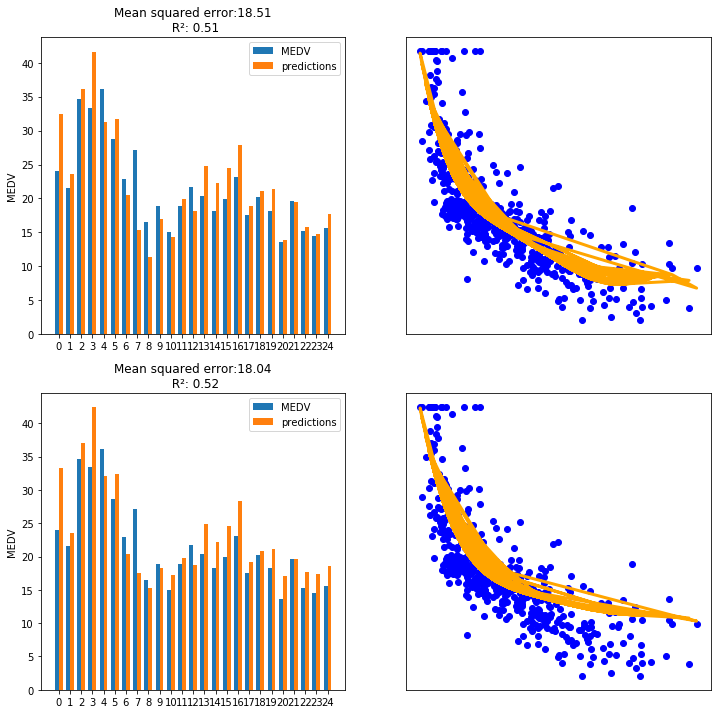

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

x = pd.DataFrame(data.data[:, 12], columns=['LSTAT'])
target = pd.DataFrame(data.target, columns=['MEDV'])

nTest = 25
X1 = x[nTest:-280]
y1 = target['MEDV'][nTest:-280]
lm1 = make_pipeline(PolynomialFeatures(5), Ridge())
model1 = lm1.fit(X1,y1)
Xtest1 = x[0:nTest]
ytest1 = target['MEDV'][0:nTest]

predictions1 = lm1.predict(x)
lm1.score(Xtest1,ytest1)
predictionsTest1 = predictions1[0:nTest]
print(predictions1.shape)
X2 = x[nTest:-1]
y2 = target['MEDV'][nTest:-1]
lm2 = make_pipeline(PolynomialFeatures(5), Ridge())
model2 = lm2.fit(X2,y2)
Xtest2 = x[0:nTest]
ytest2 = target['MEDV'][0:nTest]

predictions2 = lm2.predict(x)
lm2.score(Xtest2,ytest2)
predictionsTest2 = predictions2[0:nTest]
print("Mean squared error:", mean_squared_error(ytest2, predictionsTest2))

print('R²: %.2f' % r2_score(ytest2, predictionsTest2))

lb = np.arange(len(Xtest2))  
width = 0.35  

figure = plt.figure(figsize=(12, 12))

ax = plt.subplot(2, 2, 1)
rects1 = ax.bar(lb - width/2, ytest2, width, label='MEDV')
rects2 = ax.bar(lb + width/2, predictionsTest2, width, label='predictions')


ax.set_ylabel('MEDV')
title = "Mean squared error:%.2f"% mean_squared_error(ytest2, predictionsTest2)+"\n R²: %.2f" % r2_score(ytest2, predictionsTest2)
ax.set_title(title)
ax.set_xticks(lb)
ax.legend()

ax = plt.subplot(2, 2, 2)
plt.scatter(x, target['MEDV'],  color='blue')
plt.plot(x, predictions2, color='orange', linewidth=3)

plt.xticks(())
plt.yticks(())

ax = plt.subplot(2, 2, 3)
rects1 = ax.bar(lb - width/2, ytest1, width, label='MEDV')
rects2 = ax.bar(lb + width/2, predictionsTest1, width, label='predictions')


ax.set_ylabel('MEDV')
title = "Mean squared error:%.2f"% mean_squared_error(ytest1, predictionsTest1)+"\n R²: %.2f" % r2_score(ytest1, predictionsTest1)
ax.set_title(title)
ax.set_xticks(lb)
ax.legend()

ax = plt.subplot(2, 2, 4)
plt.scatter(x, target['MEDV'],  color='blue')
plt.plot(x, predictions1, color='orange', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()